In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
movies=pd.read_csv("movies.csv")
ratings=pd.read_csv("ratings.csv")

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [12]:
movies.shape

(10329, 3)

In [14]:
ratings.shape

(105339, 4)

In [16]:
movies.describe

<bound method NDFrame.describe of        movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                       

In [18]:
ratings.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [20]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [24]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

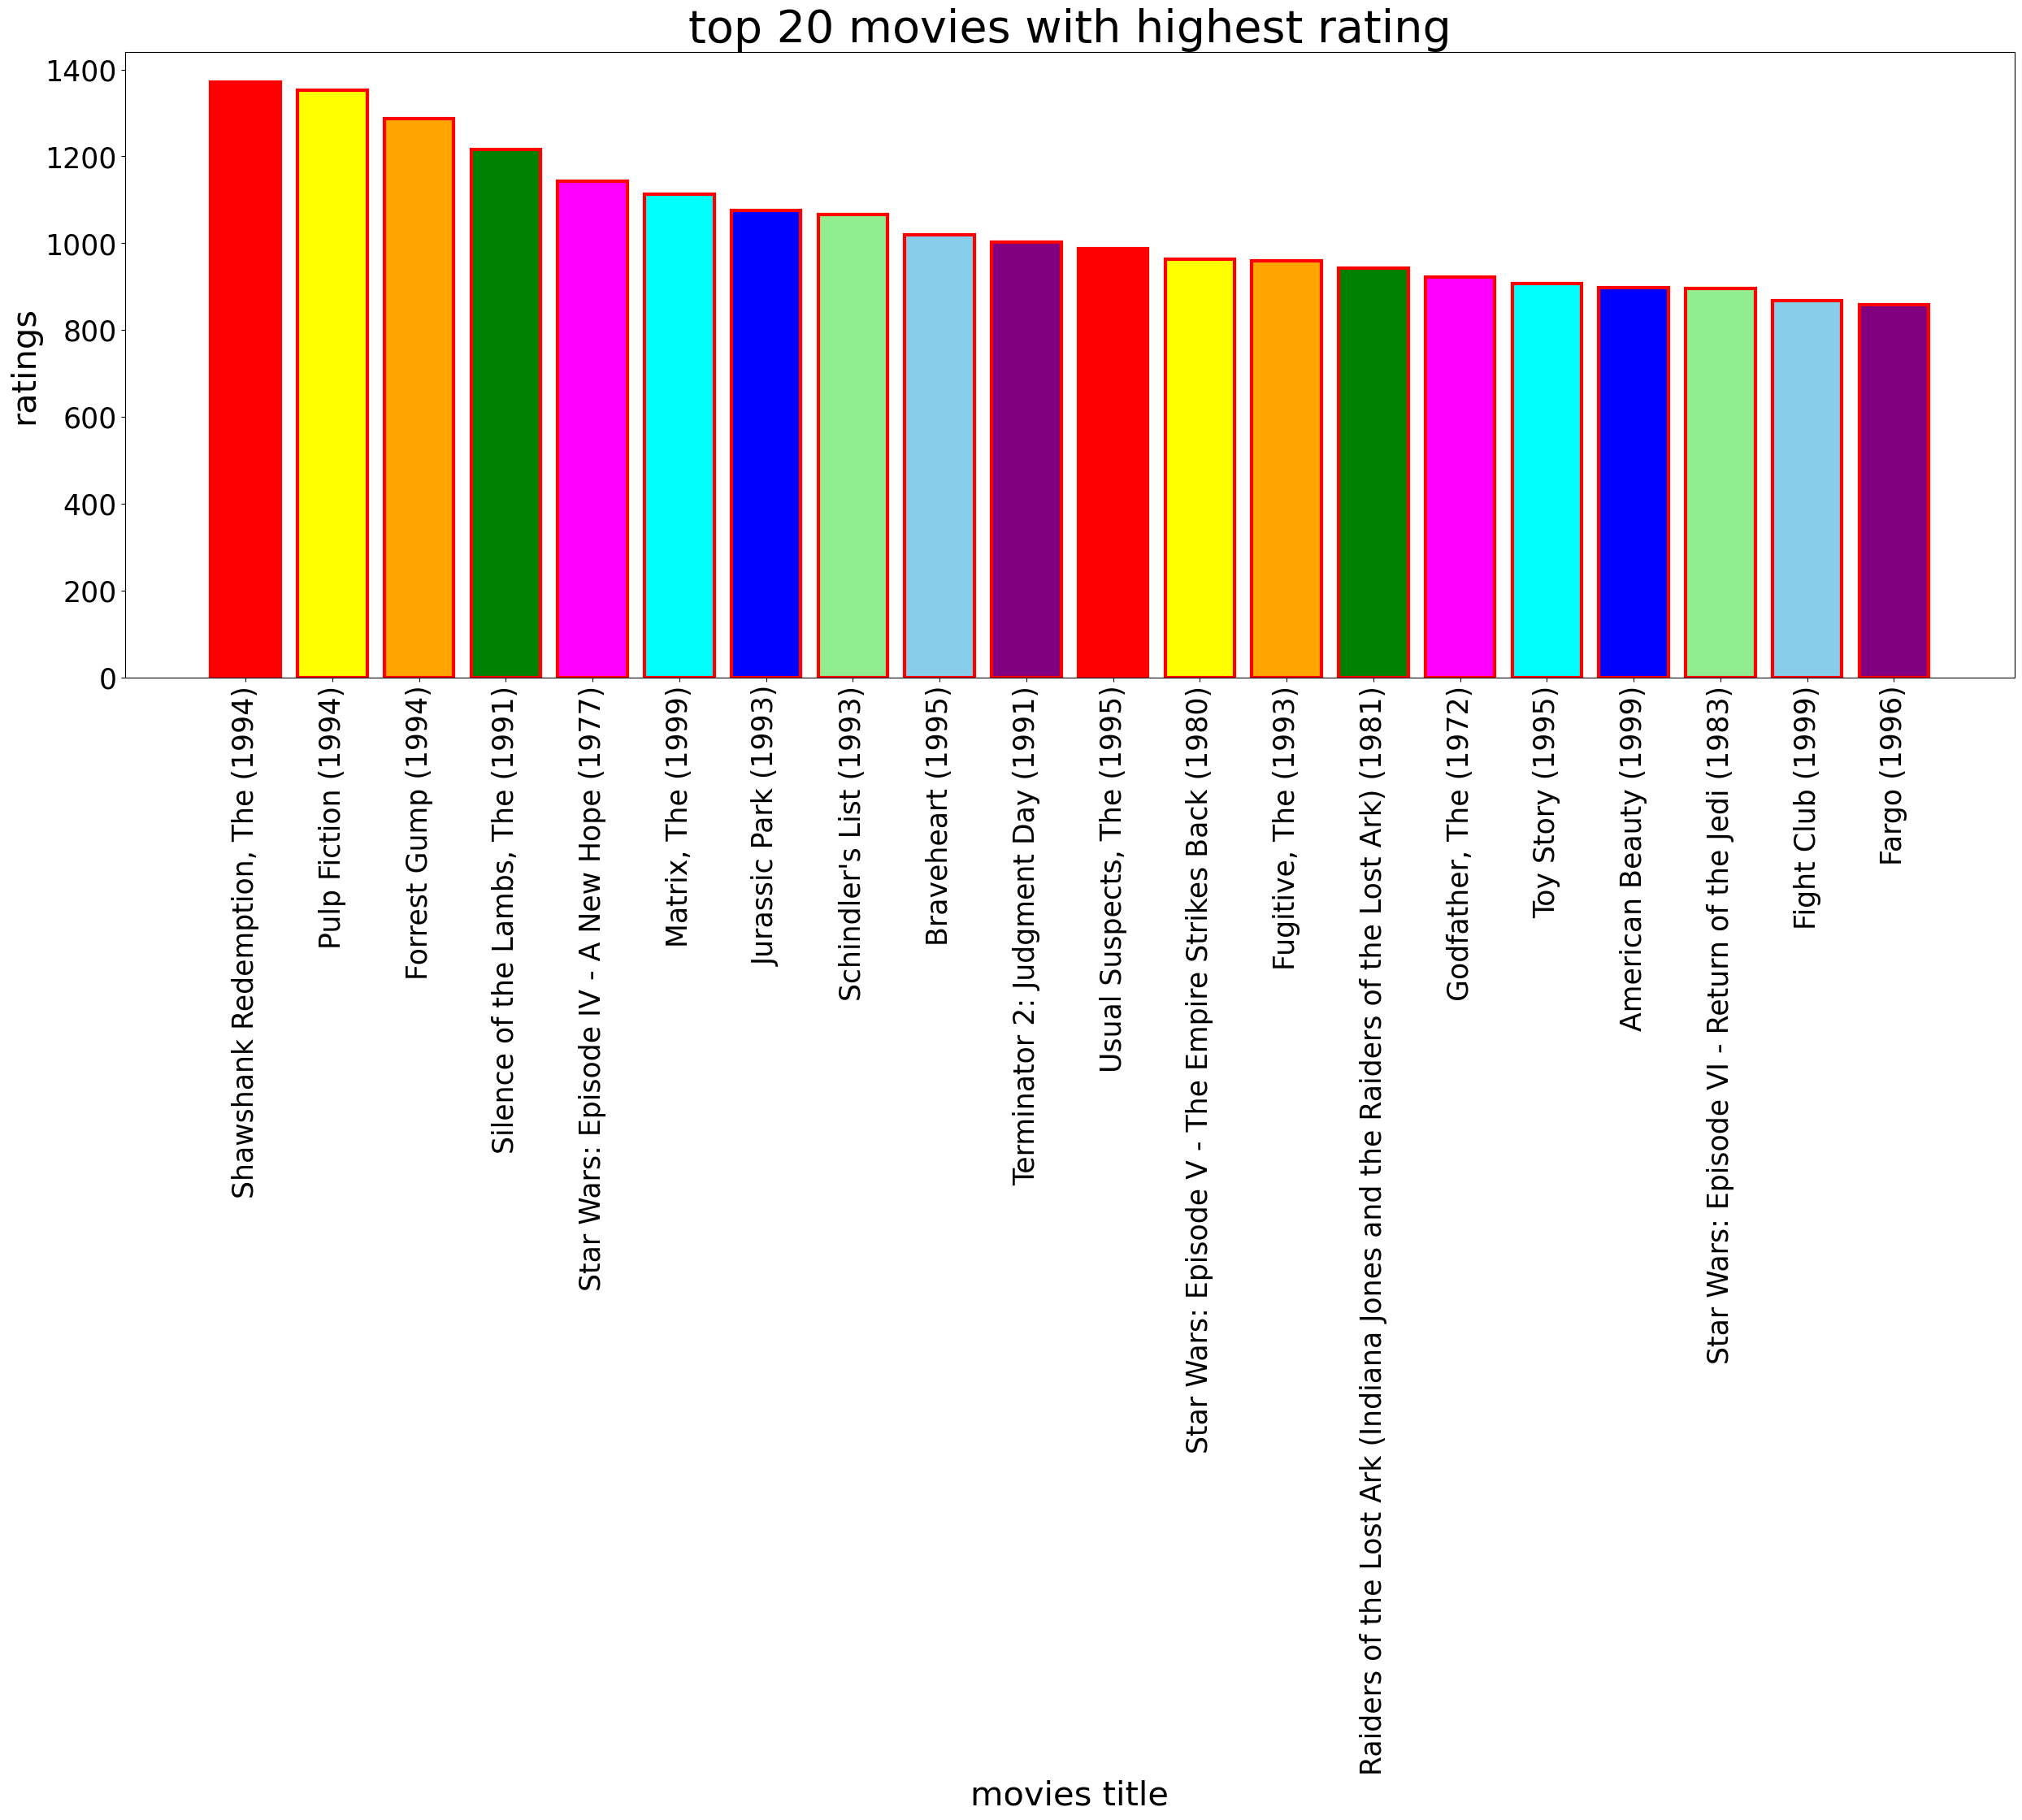

In [26]:
plt.figure(figsize=(30,10))
plt.title('top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)


In [28]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

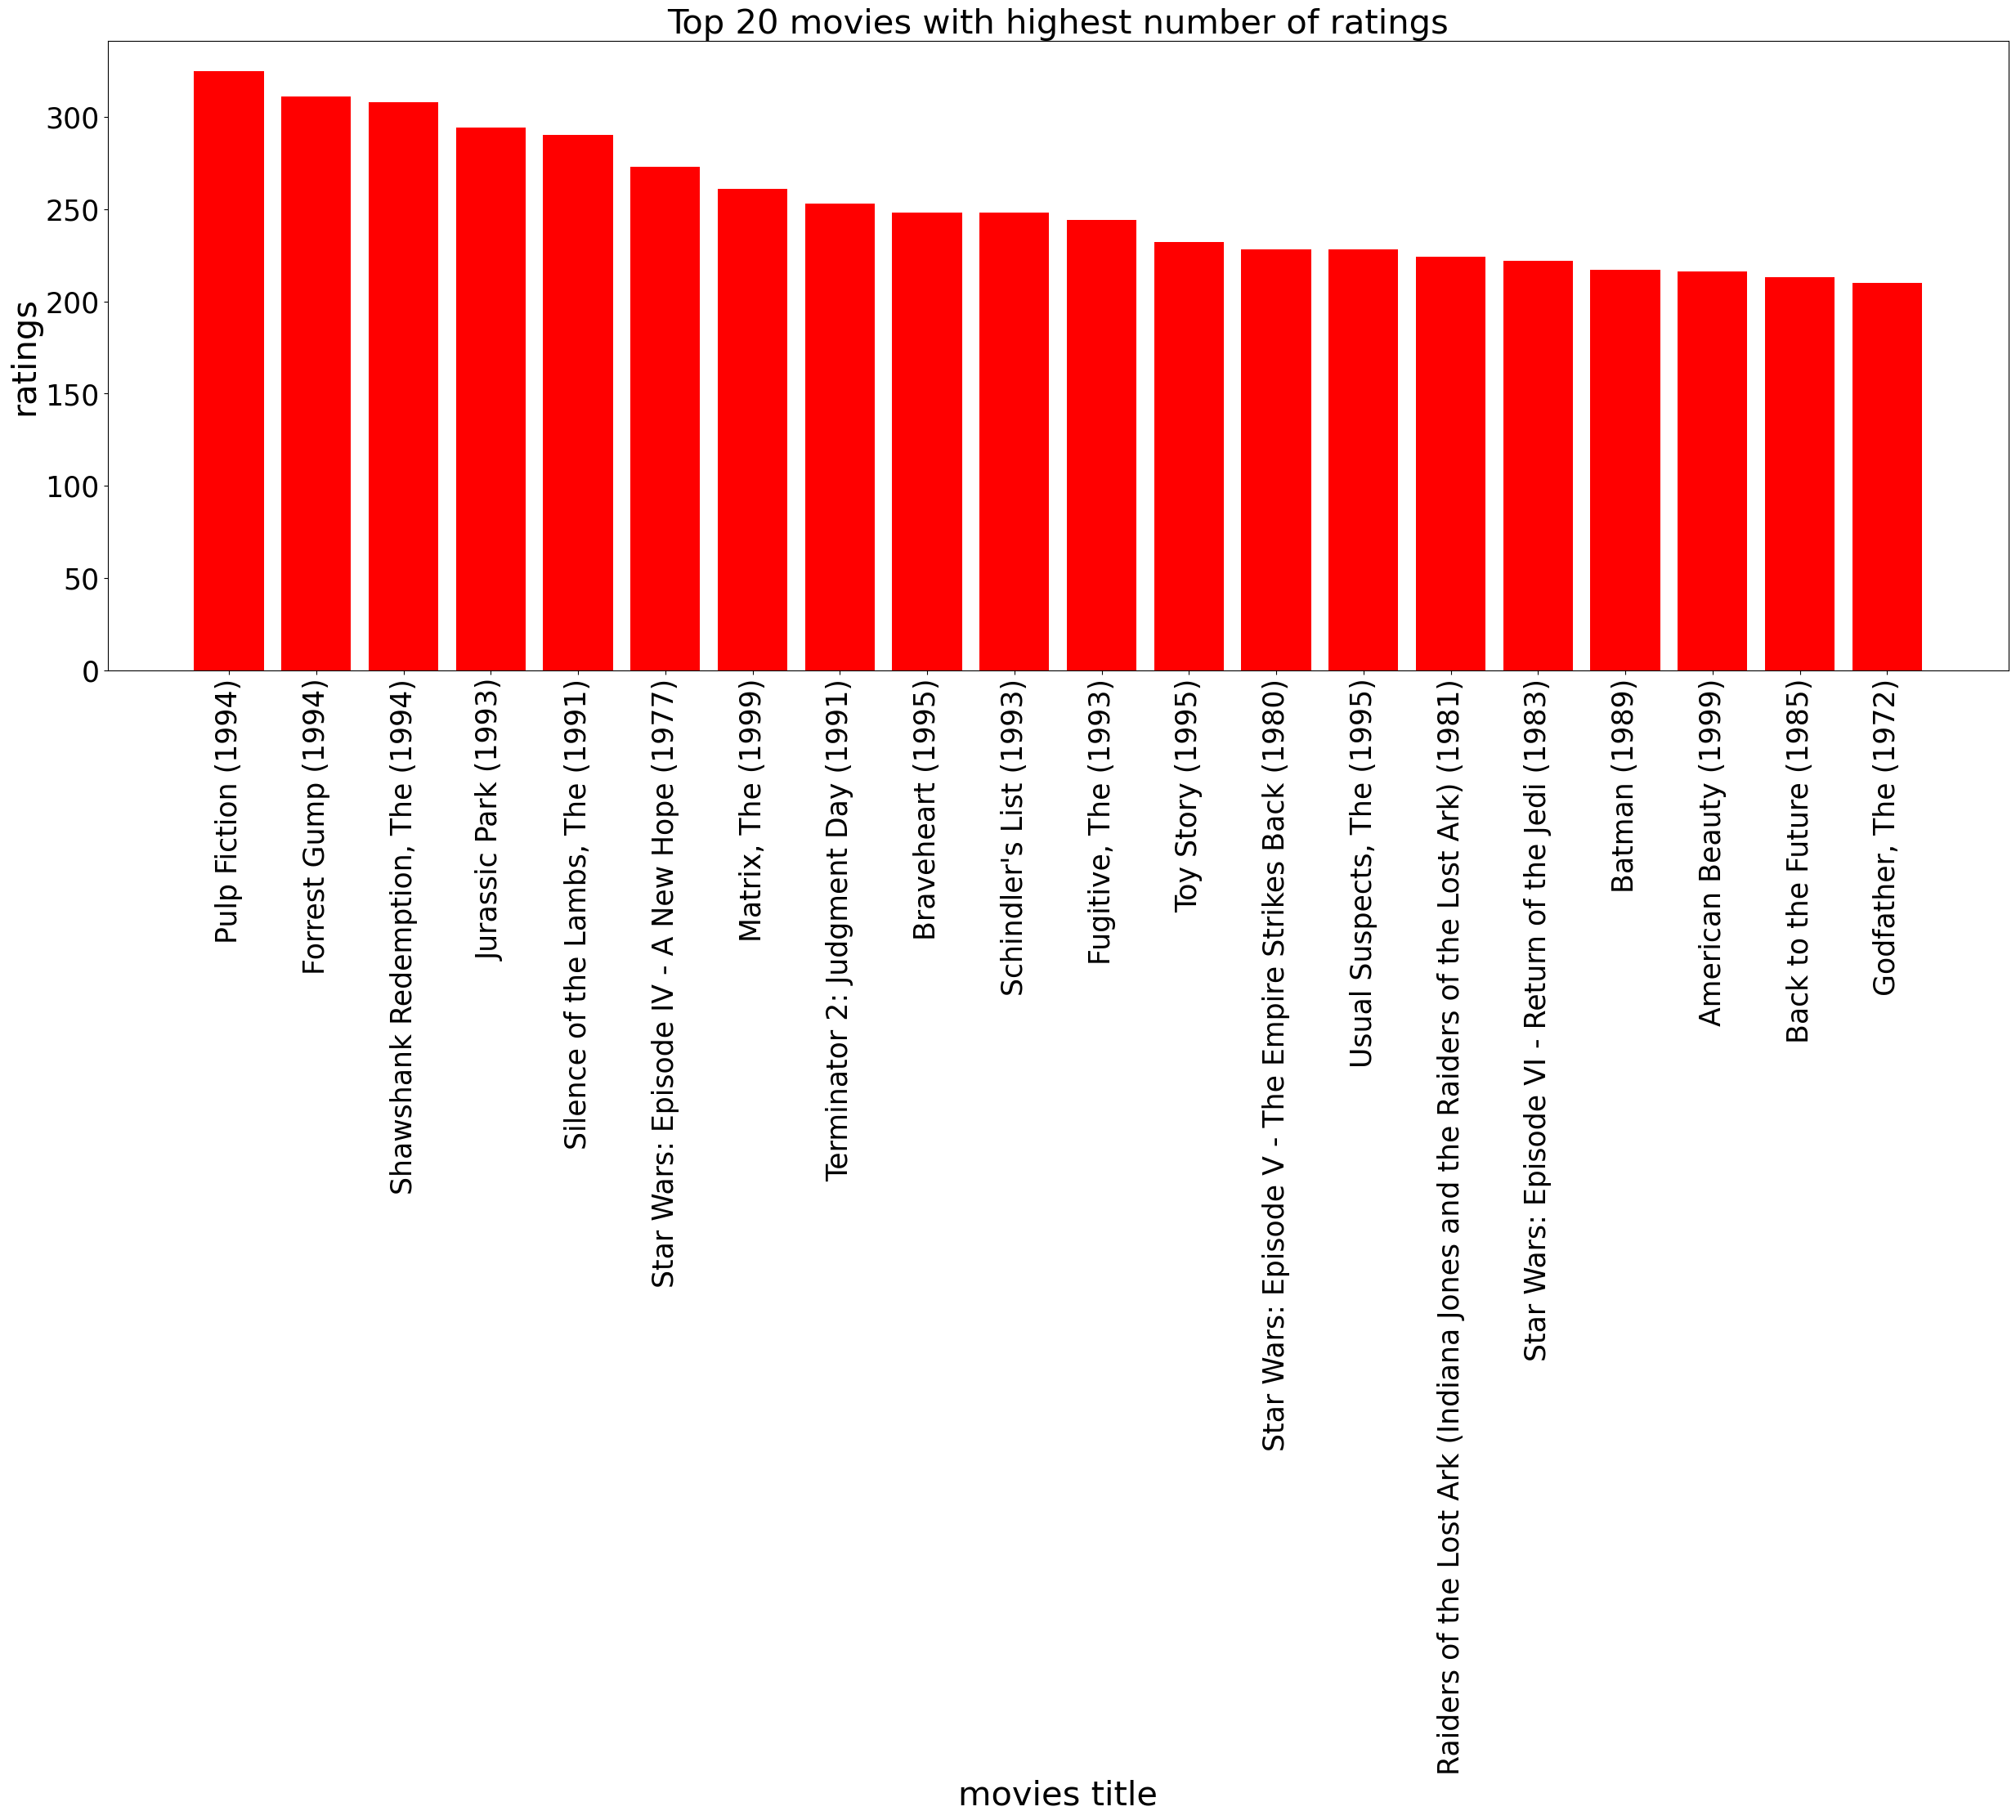

In [30]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

The "Movie Recommendation System" project involves analyzing user ratings and movie details from datasets. By merging movie titles with their ratings, it identifies the top-rated movies and those with the highest number of ratings. Visualization techniques using Python's Pandas and Matplotlib help present insightful data trends for recommendations.

                                                                   THANK YOU 